## Importing the required libraries

In [312]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D,LSTM
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [313]:
from keras import regularizers

In [314]:
import os

In [315]:
mylist= os.listdir('../../Datasets/Raw_Dataset')
mylist

['03-01-01-01-01-01-01.wav',
 '03-01-01-01-01-01-02.wav',
 '03-01-01-01-01-01-03.wav',
 '03-01-01-01-01-01-04.wav',
 '03-01-01-01-01-01-05.wav',
 '03-01-01-01-01-01-06.wav',
 '03-01-01-01-01-01-07.wav',
 '03-01-01-01-01-01-08.wav',
 '03-01-01-01-01-01-09.wav',
 '03-01-01-01-01-01-10.wav',
 '03-01-01-01-01-01-11.wav',
 '03-01-01-01-01-01-12.wav',
 '03-01-01-01-01-01-13.wav',
 '03-01-01-01-01-01-14.wav',
 '03-01-01-01-01-01-15.wav',
 '03-01-01-01-01-01-16.wav',
 '03-01-01-01-01-01-17.wav',
 '03-01-01-01-01-01-18.wav',
 '03-01-01-01-01-01-19.wav',
 '03-01-01-01-01-01-20.wav',
 '03-01-01-01-01-01-21.wav',
 '03-01-01-01-01-01-22.wav',
 '03-01-01-01-01-01-23.wav',
 '03-01-01-01-01-01-24.wav',
 '03-01-01-01-01-02-01.wav',
 '03-01-01-01-01-02-02.wav',
 '03-01-01-01-01-02-03.wav',
 '03-01-01-01-01-02-04.wav',
 '03-01-01-01-01-02-05.wav',
 '03-01-01-01-01-02-06.wav',
 '03-01-01-01-01-02-07.wav',
 '03-01-01-01-01-02-08.wav',
 '03-01-01-01-01-02-09.wav',
 '03-01-01-01-01-02-10.wav',
 '03-01-01-01-

In [316]:
mylist = ['Raw_Dataset/' + i for i in mylist]

In [317]:
mylist

['Raw_Dataset/03-01-01-01-01-01-01.wav',
 'Raw_Dataset/03-01-01-01-01-01-02.wav',
 'Raw_Dataset/03-01-01-01-01-01-03.wav',
 'Raw_Dataset/03-01-01-01-01-01-04.wav',
 'Raw_Dataset/03-01-01-01-01-01-05.wav',
 'Raw_Dataset/03-01-01-01-01-01-06.wav',
 'Raw_Dataset/03-01-01-01-01-01-07.wav',
 'Raw_Dataset/03-01-01-01-01-01-08.wav',
 'Raw_Dataset/03-01-01-01-01-01-09.wav',
 'Raw_Dataset/03-01-01-01-01-01-10.wav',
 'Raw_Dataset/03-01-01-01-01-01-11.wav',
 'Raw_Dataset/03-01-01-01-01-01-12.wav',
 'Raw_Dataset/03-01-01-01-01-01-13.wav',
 'Raw_Dataset/03-01-01-01-01-01-14.wav',
 'Raw_Dataset/03-01-01-01-01-01-15.wav',
 'Raw_Dataset/03-01-01-01-01-01-16.wav',
 'Raw_Dataset/03-01-01-01-01-01-17.wav',
 'Raw_Dataset/03-01-01-01-01-01-18.wav',
 'Raw_Dataset/03-01-01-01-01-01-19.wav',
 'Raw_Dataset/03-01-01-01-01-01-20.wav',
 'Raw_Dataset/03-01-01-01-01-01-21.wav',
 'Raw_Dataset/03-01-01-01-01-01-22.wav',
 'Raw_Dataset/03-01-01-01-01-01-23.wav',
 'Raw_Dataset/03-01-01-01-01-01-24.wav',
 'Raw_Dataset/03

In [318]:
print(mylist[1400])

Raw_Dataset/03-01-08-02-02-01-09.wav


In [319]:
print(mylist[400][6:-16])

taset/03-01-03


## Plotting the audio file's waveform and its spectrogram

In [320]:
data, sampling_rate = librosa.load('../../Datasets/Raw_Dataset/03-01-01-01-01-01-08.wav',res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
print(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13).shape)
np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13),axis=0).shape

(13, 216)


(216,)

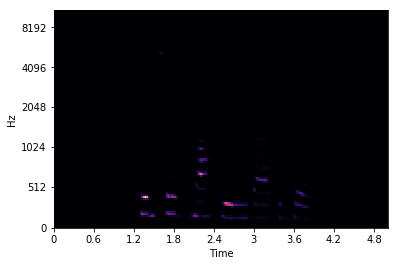

In [321]:
ps = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

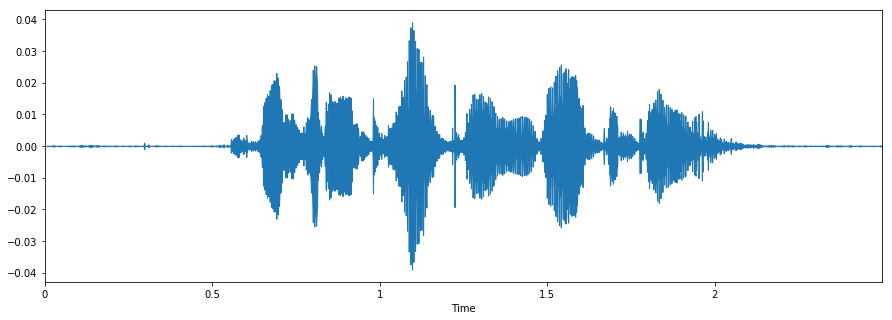

In [322]:
#% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [323]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('../../Raw_Dataset/03-01-01-01-01-01-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../Raw_Dataset/03-01-01-01-01-01-01.wav'

## Setting the labels

In [324]:
print(mylist[100])
mylist[100][18:20]

Raw_Dataset/03-01-02-01-01-01-05.wav


'02'

In [325]:
feeling_list=[]
my_new_list=[]
#print(mylist[140][6:8])
#int(mylist[140][18:20]) /2  
for i in mylist:
    if(i[18:20]=='01'):
        feeling_list.append('Neutral')
        my_new_list.append(i)
    elif(i[18:20]=='03'):
        feeling_list.append('Happy')
        my_new_list.append(i)
    elif(i[18:20]=='04'):
        feeling_list.append('Sad')
        my_new_list.append(i)
    elif(i[18:20]=='05'):
        feeling_list.append('Angry')
        my_new_list.append(i)
    

In [326]:
for i in os.listdir('../../Datasets/EMO_Dataset'):
    for j in os.listdir('../../Datasets/EMO_Dataset/' + i):
        my_new_list.append('EMO_Dataset/'+i+'/'+j)
        feeling_list.append(i)

In [327]:
a=400
print(my_new_list[a])
print(feeling_list[a])

Raw_Dataset/03-01-04-02-01-01-17.wav
Sad


In [328]:
mylist=my_new_list
len(mylist)

1011

In [329]:
print(mylist[600],feeling_list[600])

Raw_Dataset/03-01-05-02-01-02-01.wav Angry


In [330]:
labels = pd.DataFrame(feeling_list)

In [331]:
labels

,0
0,Neutral
1,Neutral
2,Neutral
3,Neutral
4,Neutral
5,Neutral
6,Neutral
7,Neutral
8,Neutral
9,Neutral


## Getting the features of audio files using librosa

In [332]:
l=[]
df = pd.DataFrame(columns=['feature'])
bookmark=0
c=0
for i in range(0,len(mylist)):
    #print(c)
    c+=1
    X, sample_rate = librosa.load('../../Datasets/'+mylist[i], res_type='kaiser_fast',sr=22050*2)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    feature = mfccs
    print(c,len(feature))
    l.append([feature.reshape(len(feature),1),feeling_list[i]])
    #[float(i) for i in feature]
    #feature1=feature[:135]
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1        

1 285
2 314
3 297
4 285
5 311
6 288
7 337
8 302
9 282
10 305
11 271
12 314
13 274
14 299
15 291
16 322
17 331
18 299
19 291
20 299
21 331
22 314
23 328
24 320
25 288
26 311
27 302
28 291
29 314
30 311
31 328
32 314
33 276
34 331
35 268
36 305
37 276
38 288
39 297
40 322
41 302
42 305
43 279
44 308
45 343
46 297
47 322
48 314
49 282
50 325
51 302
52 282
53 268
54 294
55 357
56 305
57 288
58 322
59 276
60 311
61 265
62 299
63 297
64 311
65 302
66 299
67 288
68 297
69 311
70 311
71 317
72 314
73 274
74 311
75 299
76 279
77 311
78 297
79 322
80 302
81 279
82 317
83 274
84 314
85 271
86 308
87 294
88 308
89 299
90 299
91 285
92 305
93 317
94 305
95 331
96 311
97 299
98 311
99 325
100 302
101 345
102 305
103 302
104 302
105 288
106 302
107 268
108 320
109 279
110 320
111 294
112 320
113 299
114 294
115 314
116 305
117 331
118 305
119 288
120 311
121 299
122 320
123 311
124 305
125 279
126 311
127 299
128 297
129 305
130 299
131 276
132 322
133 276
134 317
135 288
136 317
137 305
138 291
139 

In [296]:
max(data[:,])

0.03900027

In [333]:
data = np.array(l)
data.shape

(1011, 2)

In [334]:
from sklearn.utils import shuffle
sdata= shuffle(data)
sdata.shape

(1011, 2)

In [335]:
sdata[1][0].shape

(299, 1)

In [336]:
data_x = sdata[:,0]
data_y = sdata[:,1]

In [337]:
print(data_x[0].shape)
sdata[0][0].shape

(314, 1)


(314, 1)

In [338]:
min([len(data_x[i]) for i in range(0,len(data_x))])

124

## Dividing the data into test and train

In [339]:
x_train , x_test , y_train , y_test = train_test_split(data_x,data_y,test_size=0.1)

In [340]:
x_test[0].shape

(308, 1)

In [341]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


In [342]:
x_train.shape

(909,)

## Changing dimension for CNN model

In [355]:
model = Sequential()

model.add(LSTM(120,input_shape=(None,1),return_sequences=False))
model.add(Dense(4))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [356]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 120)               58560     
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 484       
_________________________________________________________________
activation_45 (Activation)   (None, 4)                 0         
Total params: 59,044
Trainable params: 59,044
Non-trainable params: 0
_________________________________________________________________


In [357]:
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [358]:
x_train[0].shape

(204, 1)

In [359]:
cnnhistory=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test))

ValueError: Error when checking input: expected lstm_30_input to have 3 dimensions, but got array with shape (909, 1)

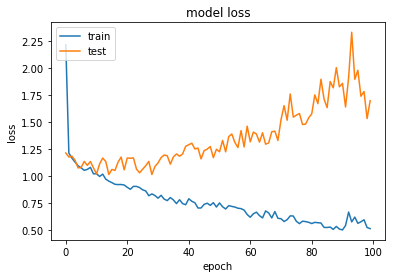

In [132]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
model.evaluate(x_test, y_test, verbose=0)

[1.6974035662573737, 0.5405405432254344]

## Saving the model

In [152]:
model_name = 'Kev_Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\i870871\Desktop\Emotion detection\Emotion GitHub\Speech-Emotion-Analyzer-master\saved_models\Kev_Emotion_Voice_Detection_Model.h5 


In [153]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [446]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model_70.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Kev_70_Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 69.49%


In [314]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_47 (Conv1D)           (None, 216, 256)          2816      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 54, 256)           0         
_________________________________________________________________
activation_55 (Activation)   (None, 54, 256)           0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 54, 256)           0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 54, 128)           163968    
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 13, 128)           0         
_________________________________________________________________
activation_56 (Activation)   (None, 13, 128)           0         
__________

## Predicting emotions on the test data

In [315]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

59/59 [==============================] - 1s 16ms/step


In [316]:
preds

array([[7.80376466e-03, 9.62889552e-01, 1.55407070e-05, 2.92911679e-02],
       [7.16310516e-02, 1.54303163e-01, 5.08573890e-01, 2.65491903e-01],
       [1.84695989e-01, 6.84620500e-01, 2.86983475e-02, 1.01985179e-01],
       [9.88743544e-01, 1.12495581e-02, 1.36404026e-08, 6.96015240e-06],
       [3.93980034e-02, 1.71780735e-01, 4.37886059e-01, 3.50935131e-01],
       [1.16309896e-02, 1.65010747e-02, 1.10494196e-01, 8.61373723e-01],
       [2.68372059e-01, 7.13985324e-01, 3.23128304e-03, 1.44113768e-02],
       [3.64005417e-01, 1.46773875e-01, 2.46021301e-01, 2.43199438e-01],
       [4.15463597e-02, 7.46486723e-01, 4.81169634e-02, 1.63849950e-01],
       [9.66158137e-02, 9.00347590e-01, 3.02657951e-03, 1.00137586e-05],
       [9.99943256e-01, 5.67326788e-05, 2.89932679e-11, 7.47230056e-10],
       [1.00000000e+00, 2.84315099e-10, 3.28281102e-18, 3.37251693e-09],
       [8.18897009e-01, 1.68473572e-01, 4.62515326e-03, 8.00425932e-03],
       [3.51007059e-02, 7.12850630e-01, 1.20654823e

In [317]:
preds1=preds.argmax(axis=1)

In [318]:
preds1

array([1, 2, 1, 0, 2, 3, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 3, 0, 2, 2, 3,
       1, 0, 2, 3, 0, 3, 1, 0, 1, 2, 0, 2, 0, 1, 3, 0, 0, 2, 1, 3, 0, 0,
       3, 3, 3, 1, 2, 0, 0, 3, 3, 3, 0, 3, 0, 2, 1], dtype=int64)

In [319]:
abc = preds1.astype(int).flatten()

In [320]:
predictions = (lb.inverse_transform((abc)))

In [321]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,happy
1,neutral
2,happy
3,angry
4,neutral
5,sad
6,happy
7,angry
8,happy
9,happy


In [322]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [323]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,sad
1,neutral
2,angry
3,happy
4,happy
5,sad
6,angry
7,neutral
8,happy
9,happy


In [324]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [325]:
finaldf[170:180]

,actualvalues,predictedvalues


In [326]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
angry,18
happy,14
neutral,12
sad,15


In [327]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,20
happy,13
neutral,12
sad,14


In [328]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [480]:
data, sampling_rate = librosa.load('output10.wav')

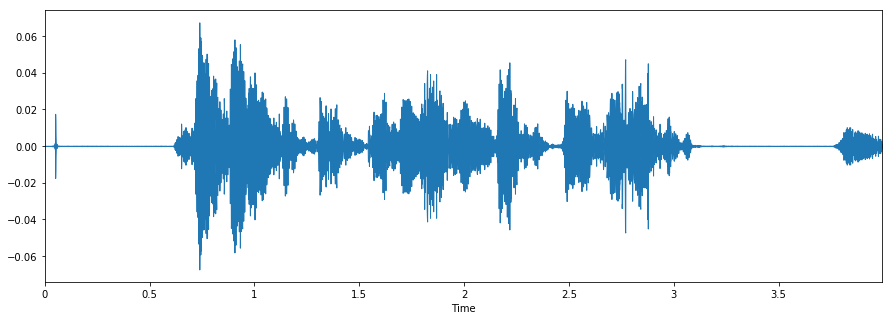

In [481]:
#% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [482]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [483]:
livedf2= pd.DataFrame(data=livedf2)

In [484]:
livedf2 = livedf2.stack().to_frame().T

In [485]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-50.566361,-50.801072,-52.240208,-50.319145,-47.955919,-47.67377,-50.878927,-50.177818,-50.954402,-53.328094,...,-28.087083,-31.406289,-33.492022,-32.606256,-31.653282,-31.121518,-31.481734,-29.16543,-25.407647,-21.827217


In [486]:
twodim= np.expand_dims(livedf2, axis=2)

In [487]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 6ms/step


In [488]:
livepreds

array([[0.00707977, 0.2454939 , 0.2691762 , 0.47825015]], dtype=float32)

In [489]:
livepreds1=livepreds.argmax(axis=1)

In [490]:
liveabc = livepreds1.astype(int).flatten()
liveabc

array([3])

In [491]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['sad'], dtype=object)

In [492]:
model_70_dict_lable_4_emotions={0:'angry' , 1:'happy' , 2:'neutral' , 3:'sad'}
model_70_dict_lable_4_emotions[3]

'sad'